In [ ]:
# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# For handling the dataset
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Explore the Data

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
First training label: 5


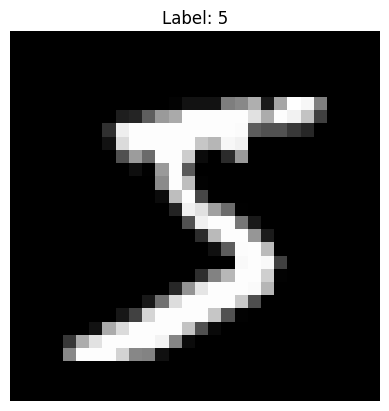

In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0])

# Visualize one image
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()


# Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images from (28,28) to (784,)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8761 - loss: 0.4334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9636 - loss: 0.1218
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9757 - loss: 0.0794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0443


# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1000
Test accuracy: 0.9729999899864197


In [ ]:
predictions = model.predict(test_images)
print("Prediction for first test image:", np.argmax(predictions[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction for first test image: 7
